# PHAS0030 Assignment Week 6

## Janos Revesz, SN: 19111202

In the following notebook I am solving the 1D wave equation with finite differences for a varying refractive index. 
$$\frac {\partial^2 \theta}{\partial t^2 } = c^2 \frac {\partial \theta^2}{\partial t^2}$$

where the refractive index is n:

$$c(x) = \frac{c}{n(x)}$$

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """ Calculate the wave equaton step by step using finite differences. We 
    use the boundary conditions so that they apply to every period of the wave.
    Input
    theta_n: the wave at t=n*dt
    theta_nm1: the wave at t=(n-1)*dt - one timestep before theta_n
    r: r=c*dt/dx in our case r is an array with different values for every spatial
    point on the graph
    
    Output: the wave at t=(n+1)*t for the the whole x axis
    """
    # theta at the next time step
    theta_np1 = 2.0*(1-r*r)*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1) + np.roll(theta_n,-1))
    return theta_np1

r is an array with one dimension, the array contains the refractive index for every x = i*dx, so basically the array represents the values of n(x) at x = i*dx

### 2. Set up the wave, arrays and initial conditions

In [3]:
# define properties of the wave
wavelength = 1
wavevector = 2*np.pi/wavelength
frequency = 1
ang_freq = 2*np.pi*frequency
speed = wavelength*frequency
# Define number of points and factor r
N = 50
mult =  5 
r = 0.3*np.ones(mult*N)
# Start and end points for change of r
st = 100
en = 150
r[st:en] = 0.1 
# Initialise
dx = wavelength/N
dt =  r*dx/speed
x = np.arange(0,mult*wavelength,dx)

### 3. Run the solver, storing the results, and plot

In [4]:
# define theta for the initial two time steps for the updater function
t = 0
theta_0 = np.sin(wavevector*x - ang_freq*t)
t += dt
theta_1 = np.sin(wavevector*x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0[50:] = 0
theta_1[51:] = 0
# Run for at least 300 steps
iters = 500
store_theta = np.array([theta_0,theta_1])

# run the updater function iters-2 times to project how the wave behaves
# with time
for n in range(iters-2):
    t += dt
    theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_next[-1] = 0
    theta_0 = theta_1
    theta_1 = theta_next
    store_theta = np.vstack([store_theta,theta_next])

#### 3.1 3D plot

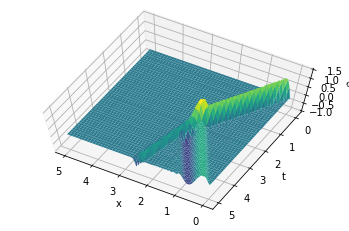

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

# create time array for the plot
sum=0
t_array = np.zeros(500)
for i in range(500):
        sum+=0.01
        t_array[i]=sum
        
# create 2D grid points for the plot
x2d,t2d = np.meshgrid(x,t_array)

# plotting
ax3d1 = fig.add_subplot(111,projection='3d')
ax3d1.plot_surface(x2d,t2d,store_theta,cmap='viridis')
ax3d1.set_xlabel('x')
ax3d1.set_ylabel('t')
ax3d1.set_zlabel(r'$\theta$')
ax3d1.view_init(70, 120)

When the wave reaches the boundary with the changing reflactive index a portion of the wave reflects of that boundary. Because of the conservation of energy the incident and transmitted waves' energies still mach up with the original wave's energy. The frequency of the wave doesn't change in the ne medium, this is also clear from the 2D subplots. 

#### 3.2 2D subplots

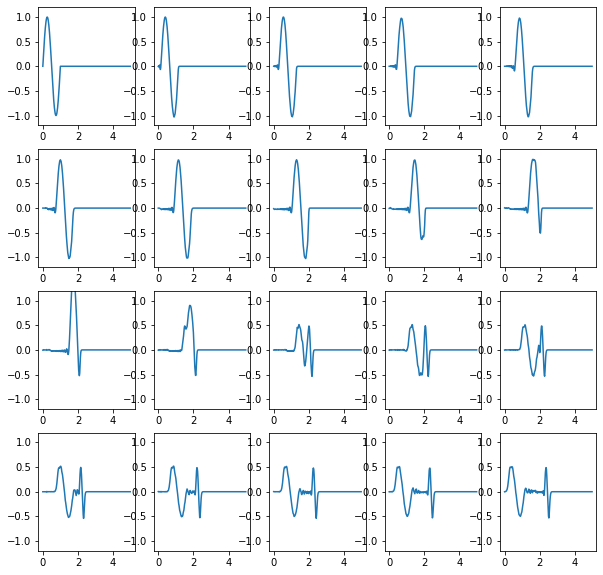

In [6]:
# creating the subplots

fig_parts = plt.figure(figsize=(10,10))
rows = 4
cols = 5
num  = rows*cols
step = int(iters/num)
for i in range(num):
    ax = fig_parts.add_subplot(4,5,i+1)
    ax.plot(x,store_theta[i*step])
    ax.set_ylim((-1.2,1.2)) 


The first plot offers less information in almost all regards apart from the reflection shown. On the second plot it is easy to see how the aplitude changes with the new boundary and how the frequency remains the same.

### 4. Varying refractive index

This time the refractive index is changing with respect of the x coordinates.

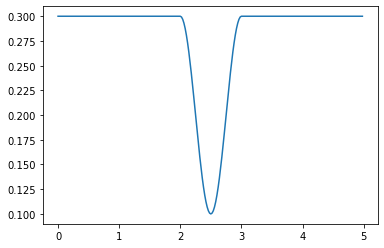

In [7]:
# define theta for the initial two time steps for the updater function
t = 0
theta_0v = np.sin(wavevector*x - ang_freq*t)
t += dt
theta_1v = np.sin(wavevector*x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0v[50:] = 0.0
theta_1v[51:] = 0.0
# Set up rv
rv =  0.3*np.ones(mult*N)
rv[st:en] = 0.1*(np.cos(2*np.pi*(x[st:en]-2*wavelength)/wavelength)+2)
plt.plot(x,rv)
# Run for 600 steps
iters = 600
store_thetav = np.array([theta_0v,theta_1v])
for n in range(iters):
    t += dt
    theta_nextv = explicit_wave_eq_update(theta_1v,theta_0v,rv)
    theta_0v = theta_1v
    theta_1v = theta_nextv
    store_thetav = np.vstack([store_thetav,theta_nextv])

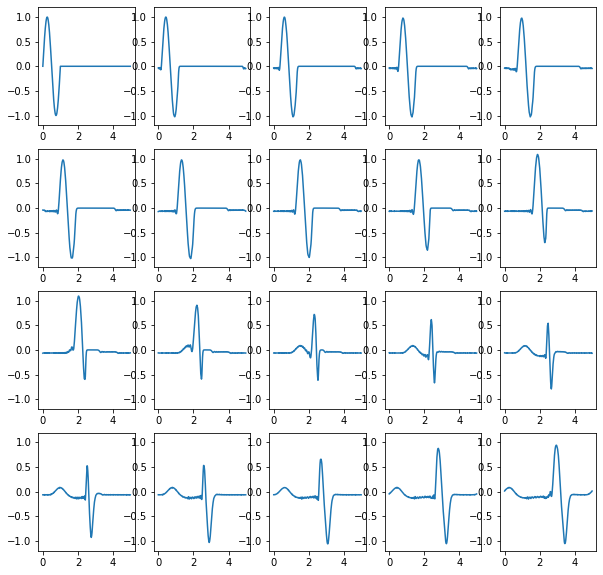

In [8]:
fig_3d3 = plt.figure(figsize=(10,10))
rows = 4
cols = 5
num  = rows*cols
step = int(iters/num)
for i in range(num):
    ax = fig_3d3.add_subplot(4,5,i+1)
    ax.plot(x,store_thetav[i*step])
    ax.set_ylim((-1.2,1.2))

In this case rather than a sudden boundary change the shape of the wave goes through a continuous change. The frequency remains constant, but the amplitude first goes down than increases as the wave gets to the end of the boundary.